In [1]:
import os

import pickle
import re
import arviz as az

import pandas as pd
import numpy as np

basepath = 'C:\\Users\\hyone\\Documents\\GitHub\\rt-estimation\\data'
dirs = os.listdir(basepath)
search_dirs = [dir for dir in dirs if '2023-01-26' in dir]

In [2]:
import importlib
import model
importlib.reload(model)

<module 'model' from 'C:\\Users\\hyone\\Documents\\GitHub\\rt-estimation\\src\\model.py'>

In [3]:
with open(f"{basepath}\\2023-01-31_NUTS_infer_['rt_0', 'rt_1', 'k', 'midpoint', 'I0']\\model.pkl", 'rb') as file:
        sir_model = pickle.load(file)

In [47]:
sir_model.trace

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

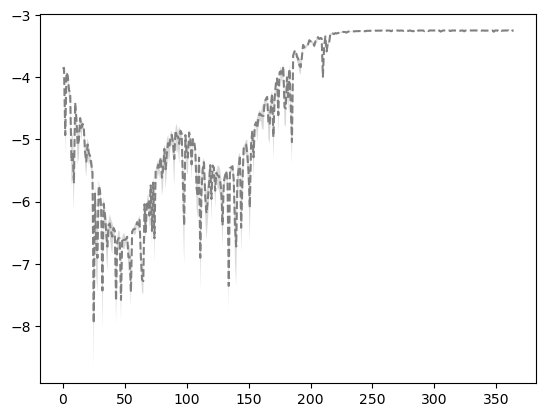

In [61]:
# 
quantiles = sir_model.trace.log_likelihood.quantile(q=[0.025, 0.975], dim=["chain", "draw"]).to_array().values
lower = quantiles[0][0]
upper = quantiles[0][1]
plt.plot(sir_model.trace.log_likelihood.mean(dim=["chain", "draw"]).to_array().values.T, '--', label="likelihood mean", color='gray')
plt.fill_between(range(365), lower, upper, facecolor='gray', alpha=0.3, label='95% HDI')

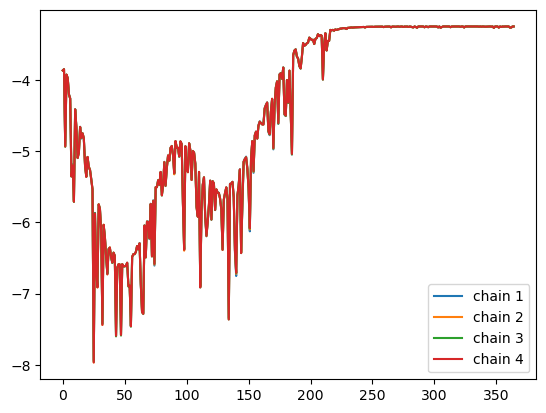

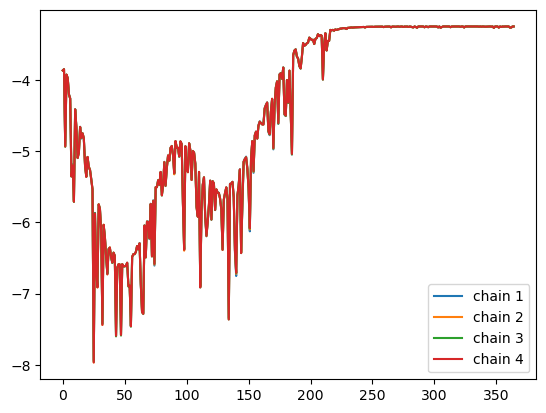

In [41]:
sir_model.plot_likelihood()

In [29]:
sir_model.trace.posterior['i'].mean(dim=["chain"])

pm.StudentT("i_est",
            nu=sir_model.likelihood['nu'],
            mu=i,
            sigma=pt.abs(1+sir_model.likelihood['sigma']*i))

<xarray.DataArray 'i' (draw: 5000, i_dim_0: 365)>
array([[3.38117484e+01, 3.74440879e+01, 4.14606866e+01, ...,
        4.43783639e-05, 4.12006976e-05, 3.82505959e-05],
       [3.39637982e+01, 3.76029032e+01, 4.16259546e+01, ...,
        5.62489128e-05, 5.22841692e-05, 4.85989722e-05],
       [3.40921068e+01, 3.77585852e+01, 4.18132599e+01, ...,
        4.09232074e-05, 3.79839556e-05, 3.52558506e-05],
       ...,
       [3.52246740e+01, 3.89065971e+01, 4.29670223e+01, ...,
        4.86093929e-05, 4.51594937e-05, 4.19545601e-05],
       [3.51305575e+01, 3.88008323e+01, 4.28482646e+01, ...,
        5.63866049e-05, 5.24101725e-05, 4.87142210e-05],
       [3.47175956e+01, 3.83558258e+01, 4.23691934e+01, ...,
        7.40959388e-05, 6.89669245e-05, 6.41931697e-05]])
Coordinates:
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999
  * i_dim_0  (i_dim_0) int32 0 1 2 3 4 5 6 7 ... 357 358 359 360 361 362 363 364

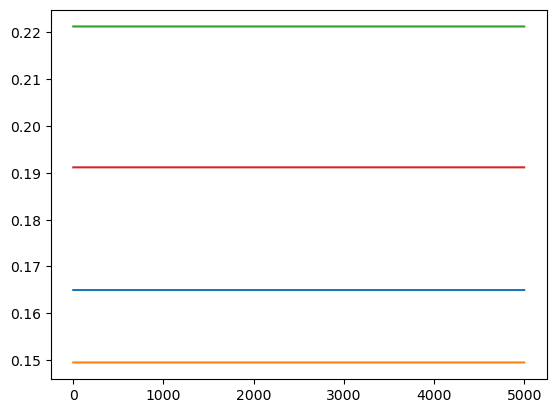

In [20]:
import matplotlib.pyplot as plt

plt.plot(sir_model.trace.sample_stats['step_size'].values.T)

In [3]:
df_list = []
for search_dir in search_dirs:
    print(search_dir)
    with open(f'{basepath}/{search_dir}/model.pkl', 'rb') as file:
        sir_model = pickle.load(file)

    vars = re.findall(r'\[\'.*?\'\]', search_dir)[0][2:-2].split("\', \'")
    
    hdi = az.hdi(sir_model.trace, var_names=vars, hdi_prob = 0.95).to_dataframe()
    
    data = {}
    for var in vars:
        true_var = getattr(sir_model.data, var)
        # print(var)
        # print(hdi[var]['lower'])
        # print(hdi[var]['higher'])
        # print(f"In HDI? {(hdi[var]['lower'] <= true_var) & (true_var <= hdi[var]['higher'])}")
        data = data | {
            f'{var}_lower': [hdi[var]['lower']],
            f'{var}_higher': [hdi[var]['higher']],
            f'{var}_true': [true_var]
        }
    df = pd.DataFrame.from_dict(data)
    df['directory'] = search_dir
    df['inferred parameters'] = str(vars)
    df['num inferred parameters'] = len(vars)
    df_list.append(df)

2023-01-26_metropolis_infer_['k', 'I0']
2023-01-26_metropolis_infer_['k', 'midpoint', 'I0']
2023-01-26_metropolis_infer_['midpoint', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'k', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'k', 'midpoint', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'midpoint', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'rt_1', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'rt_1', 'k', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'rt_1', 'k', 'midpoint', 'I0']
2023-01-26_metropolis_infer_['rt_0', 'rt_1', 'midpoint', 'I0']
2023-01-26_metropolis_infer_['rt_1', 'I0']
2023-01-26_metropolis_infer_['rt_1', 'k', 'I0']
2023-01-26_metropolis_infer_['rt_1', 'k', 'midpoint', 'I0']
2023-01-26_metropolis_infer_['rt_1', 'midpoint', 'I0']
2023-01-26_NUTS_infer_['rt_0', 'rt_1', 'k', 'midpoint', 'I0']


In [4]:
df_hdi = pd.concat(df_list)

In [5]:
df_hdi

,k_lower,k_higher,k_true,I0_lower,I0_higher,I0_true,directory,inferred parameters,num inferred parameters,midpoint_lower,midpoint_higher,midpoint_true,rt_0_lower,rt_0_higher,rt_0_true,rt_1_lower,rt_1_higher,rt_1_true
0,0.101233,0.110519,0.1,111.0,121.0,100.0,"2023-01-26_metropolis_infer_['k', 'I0']","['k', 'I0']",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.101330,0.111140,0.1,110.0,123.0,100.0,"2023-01-26_metropolis_infer_['k', 'midpoint', ...","['k', 'midpoint', 'I0']",3,99.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,111.0,127.0,100.0,"2023-01-26_metropolis_infer_['midpoint', 'I0']","['midpoint', 'I0']",2,99.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,107.0,122.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'I0']","['rt_0', 'I0']",2,NaN,NaN,NaN,1.396564,1.405636,1.4,NaN,NaN,NaN
0,0.106750,0.123347,0.1,93.0,111.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'k', 'I0']","['rt_0', 'k', 'I0']",3,NaN,NaN,NaN,1.404902,1.418824,1.4,NaN,NaN,NaN
0,0.112057,0.130845,0.1,91.0,109.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'k', 'mid...","['rt_0', 'k', 'midpoint', 'I0']",4,98.0,99.0,100.0,1.415628,1.432684,1.4,NaN,NaN,NaN
0,NaN,NaN,NaN,107.0,122.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'midpoint...","['rt_0', 'midpoint', 'I0']",3,98.0,100.0,100.0,1.399960,1.413333,1.4,NaN,NaN,NaN
0,NaN,NaN,NaN,91.0,109.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'rt_1', '...","['rt_0', 'rt_1', 'I0']",3,NaN,NaN,NaN,1.415834,1.439434,1.4,3.137347,3.340593,3.0
0,0.093877,0.116070,0.1,91.0,109.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'rt_1', '...","['rt_0', 'rt_1', 'k', 'I0']",4,NaN,NaN,NaN,1.411193,1.437428,1.4,3.000786,3.342470,3.0
0,0.111737,0.177178,0.1,93.0,113.0,100.0,"2023-01-26_metropolis_infer_['rt_0', 'rt_1', '...","['rt_0', 'rt_1', 'k', 'midpoint', 'I0']",5,97.0,99.0,100.0,1.401501,1.433406,1.4,2.676072,3.087919,3.0


In [6]:
# df_hdi.to_csv(f'{basepath}/hdi_summary.csv', index=False)

In [14]:
beta_true = sir_model.data.rt / sir_model.data.t_I

In [32]:
beta_hat = sir_model.trace.posterior["beta_t"].mean(dim=["chain", "draw"]).data
beta_ci = az.hdi(sir_model.trace, var_names="beta_t", hdi_prob=0.95).to_array().squeeze().data

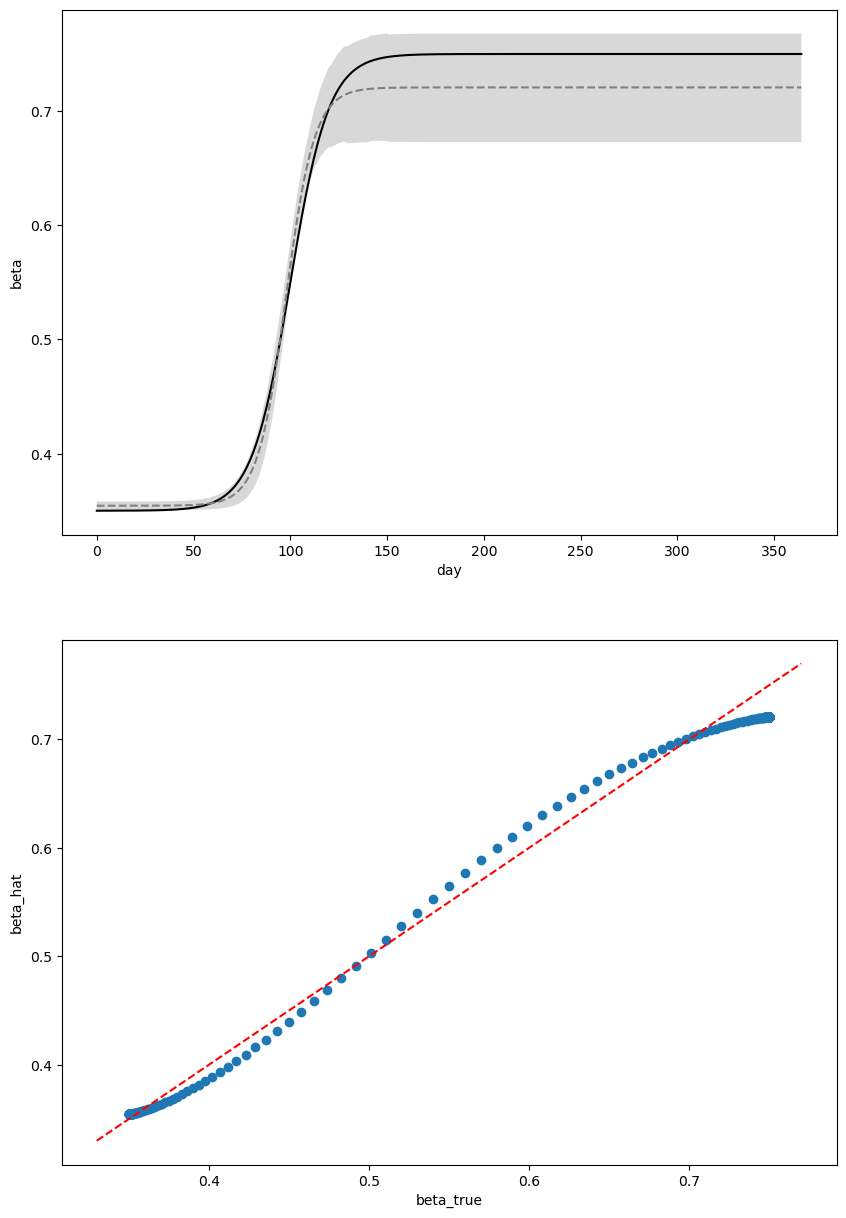

In [40]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, figsize=(10, 15))

t = np.arange(365)

ax[0].plot(t, beta_true, color="black", label="truth")
ax[0].plot(t, beta_hat, '--', color="gray", label="posterior mean")
ax[0].fill_between(t, beta_ci[:, 0], beta_ci[:, 1], facecolor='gray', alpha=0.3, label='95% HDI')
ax[0].set_xlabel('day')
ax[0].set_ylabel('beta')

ax[1].scatter(beta_true, beta_hat)
ax[1].set_xlabel('beta_true')
ax[1].set_ylabel('beta_hat')
x_vals = np.array(ax[1].get_xlim())
y_vals = x_vals
plt.plot(x_vals, y_vals, '--', color='red')

In [44]:
sir_model.data.I0
sir_model.data.S0
sir_model.data.N

100000.0

In [53]:
from scipy.integrate import odeint
from scipy.interpolate import interp1d

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta_true_interp(t) * S * I / N
    dIdt = beta_true_interp(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
S0_true = sir_model.data.S0
I0_true = sir_model.data.I0
N = sir_model.data.N
R0_true = N - S0_true - I0_true
y0 = S0_true, I0_true, R0_true

# ODE parameters
gamma_true = 1./sir_model.data.t_I
beta_true_interp = interp1d(t, beta_true, bounds_error=False, fill_value="extrapolate")

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta_true_interp, gamma_true))
S, I, R = ret.T

In [63]:
# Initial conditions vector
S0_true = sir_model.data.S0
I0_hat = sir_model.trace.posterior["I0"].mean().values
N = sir_model.data.N
R0_hat = N - S0_true - I0_hat
y0_hat = S0_true, I0_hat, R0_hat

# ODE parameters
gamma_true = 1./sir_model.data.t_I
beta_hat_interp = interp1d(t, beta_hat, bounds_error=False, fill_value="extrapolate")

# Integrate the SIR equations over the time grid, t.
ret_hat = odeint(deriv, y0_hat, t, args=(N, beta_hat_interp, gamma_true))
S_hat, I_hat, R_hat = ret_hat.T

In [74]:
S_post = sir_model.trace.posterior["S"].mean(dim=["draw", "chain"]).values
I_post = sir_model.trace.posterior["I"].mean(dim=["draw", "chain"]).values
R_post = N - S_post - I_post

In [76]:
len(S_post)

365

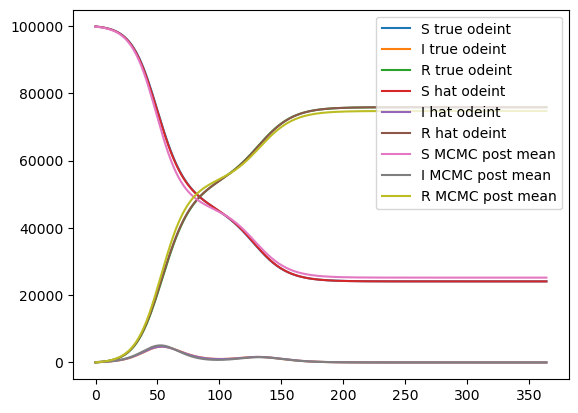

In [79]:
plt.plot(S, label="S true odeint")
plt.plot(I, label="I true odeint")
plt.plot(R, label="R true odeint")
plt.plot(S_hat, label="S hat odeint")
plt.plot(I_hat, label="I hat odeint")
plt.plot(R_hat, label="R hat odeint")
plt.plot(S_post, label="S MCMC post mean")
plt.plot(I_post, label="I MCMC post mean")
plt.plot(R_post, label="R MCMC post mean")
plt.legend()

In [81]:
I_post[0]

113.97232684725446

In [80]:
I_hat[0]

103.23855